In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [161]:
plt.rcParams["figure.figsize"] = (12,8)

In [10]:
dataset = pd.read_csv('../features_complete_v2.csv')
dataset.shape

(6007, 32)

In [11]:
dataset.describe()

,comments count,section,type,person,people,cat,dog,other animal,poster,clothing,...,kw_2,kw_3,kw_4,kw_5,kw_6,kw_7,kw_8,kw_9,kw_10,score
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,...,6007.0,6007.0,6007.0,6007.0,6007.0,6007.0,6007.0,6007.0,6007.0,6007.000000
mean,71.330281,2.029133,1.290994,0.275512,0.142667,0.020809,0.021475,0.016814,0.037290,0.119194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.321914
std,153.086018,0.760530,0.454258,0.446809,0.349762,0.142757,0.144973,0.128584,0.189487,0.324044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.028940
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.809028
50%,20.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000
75%,80.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.225626
max,2707.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.012500


In [166]:
dataset = dataset[['comments count', 'section', 'type', 'person', 'people', 'cat', 'dog', 'other animal', 
                   'poster', 'clothing', 'car', 'toy', 'tree', 'glasses', 'building', 'electronic device', 
                   'airplane', 'guitar', 'pattern', 'score']]


In [167]:
dataset.describe()

,comments count,section,type,person,people,cat,dog,other animal,poster,clothing,car,toy,tree,glasses,building,electronic device,airplane,guitar,pattern,score
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,71.330281,2.029133,1.290994,0.275512,0.142667,0.020809,0.021475,0.016814,0.037290,0.119194,0.014483,0.010821,0.006659,0.005494,0.007658,0.009655,0.002497,0.002331,0.028966,15.321914
std,153.086018,0.760530,0.454258,0.446809,0.349762,0.142757,0.144973,0.128584,0.189487,0.324044,0.119481,0.103467,0.081337,0.073921,0.087180,0.097795,0.049913,0.048224,0.167726,14.028940
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.809028
50%,20.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
75%,80.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.225626
max,2707.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,117.012500


# Ciljno obeležje

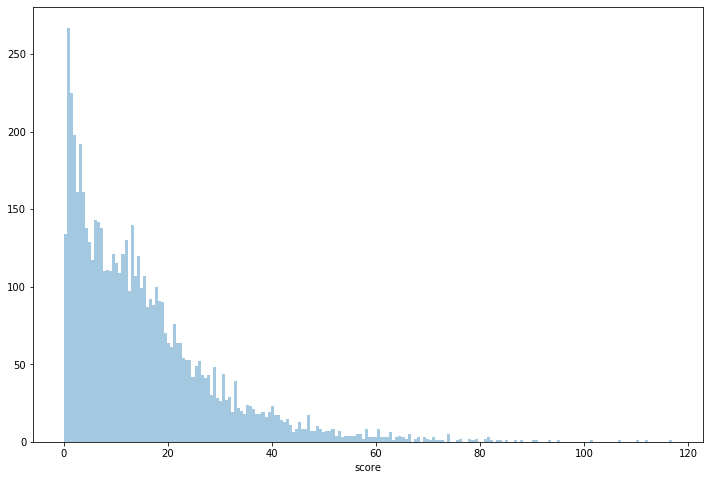

In [113]:
sb.distplot(dataset['score'], bins=200, kde=False)

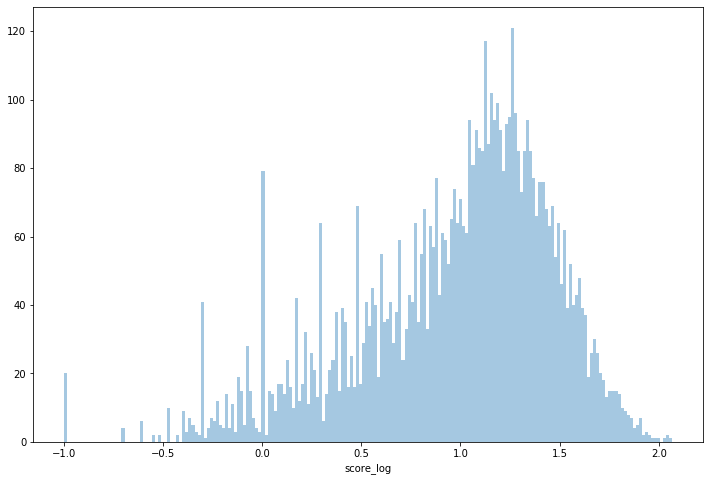

In [178]:
scores = np.where(dataset['score'] > 0.1, dataset['score'], 0.1)

dataset['score_log'] = np.log10(scores)

sb.distplot(dataset['score_log'], bins=200, kde=False)

In [135]:
pos = (dataset['score'] >= 1).sum()
neg = (dataset['score'] < 1).sum()

print("Positive scores :", pos)
print("Negative scores :", neg)

Positive scores : 5724
Negative scores : 283


# Sekcija

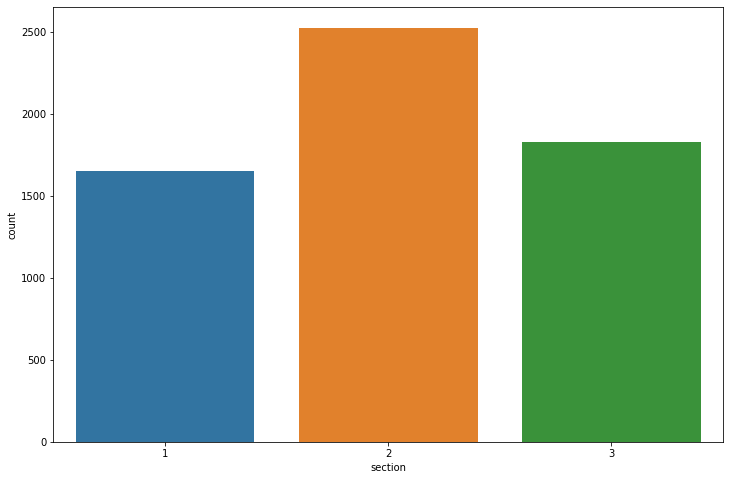

In [136]:
# hot -> 1; trending -> 2; fresh -> 3
sb.countplot(dataset['section'])

Median for section_hot : 21.490843918239204
Median for section_trending : 13.653846153846153
Median for section_fresh : 2.636363636363636

Mean for section_hot : 25.17378195533065
Mean for section_trending : 16.999029880530276
Mean for section_fresh : 4.093103303888465


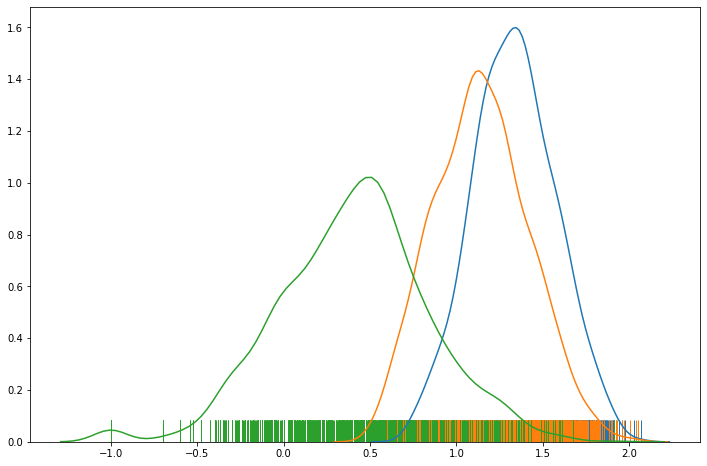

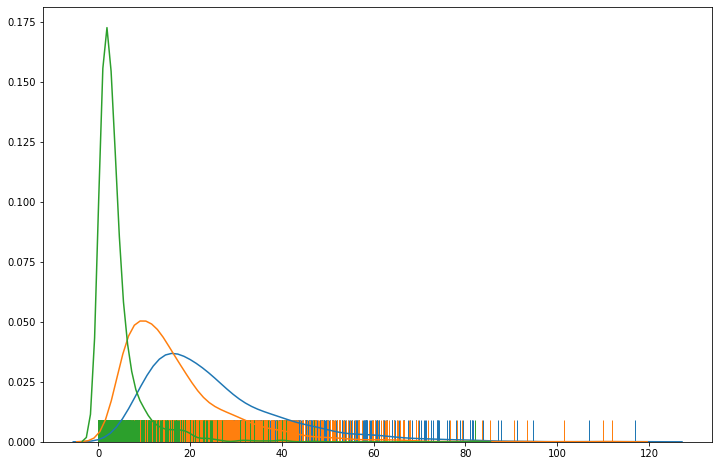

In [146]:
section_hot = dataset.loc[dataset['section'] == 1]
section_trending = dataset.loc[dataset['section'] == 2]
section_fresh = dataset.loc[dataset['section'] == 3]

print("Median for section_hot :", section_hot['score'].median())
print("Median for section_trending :", section_trending['score'].median())
print("Median for section_fresh :", section_fresh['score'].median())
print()
print("Mean for section_hot :", section_hot['score'].mean())
print("Mean for section_trending :", section_trending['score'].mean())
print("Mean for section_fresh :", section_fresh['score'].mean())

sb.distplot(section_hot[['score_log']], hist=False, rug=True)
sb.distplot(section_trending[['score_log']], hist=False, rug=True)
sb.distplot(section_fresh[['score_log']], hist=False, rug=True)

plt.show()

sb.distplot(section_hot[['score']], hist=False, rug=True)
sb.distplot(section_trending[['score']], hist=False, rug=True)
sb.distplot(section_fresh[['score']], hist=False, rug=True)

plt.show()

# Tip

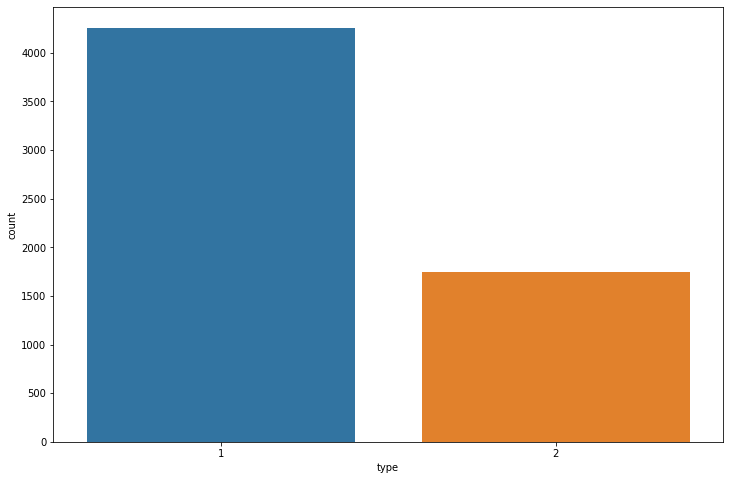

In [138]:
# photo -> 1; animated ->
sb.countplot(dataset['type'])

Median for photos : 10.857142857142858
Median for animated : 14.684574594146227

Mean for photos : 14.20069785683031
Mean for animated : 18.053754514960364


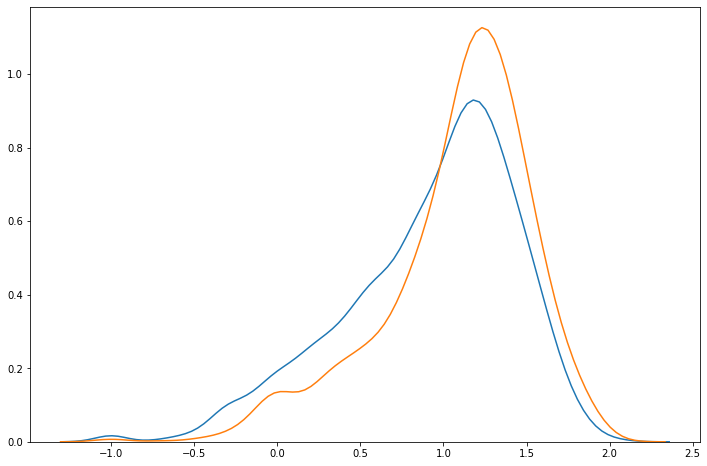

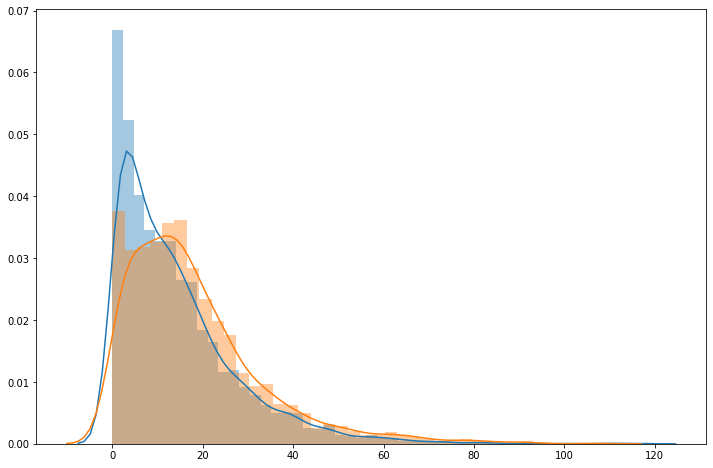

In [181]:
photo = dataset.loc[dataset['type'] == 1]
animated = dataset.loc[dataset['type'] == 2]

print("Median for photos :", photo['score'].median())
print("Median for animated :", animated['score'].median())
print()
print("Mean for photos :", photo['score'].mean())
print("Mean for animated :", animated['score'].mean())

sb.distplot(photo[['score_log']], hist=False)
sb.distplot(animated[['score_log']], hist=False)

plt.show()

sb.distplot(photo[['score']], hist=True)
sb.distplot(animated[['score']], hist=True)

plt.show()

# Komentari

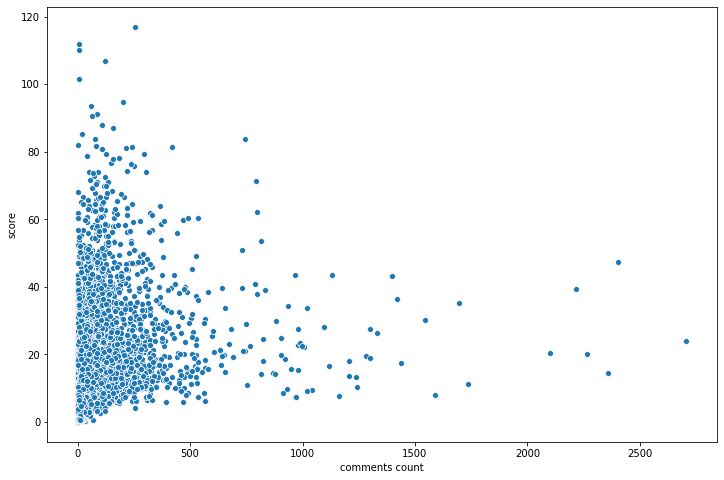

In [149]:
sb.scatterplot(x='comments count', y='score', data=dataset)

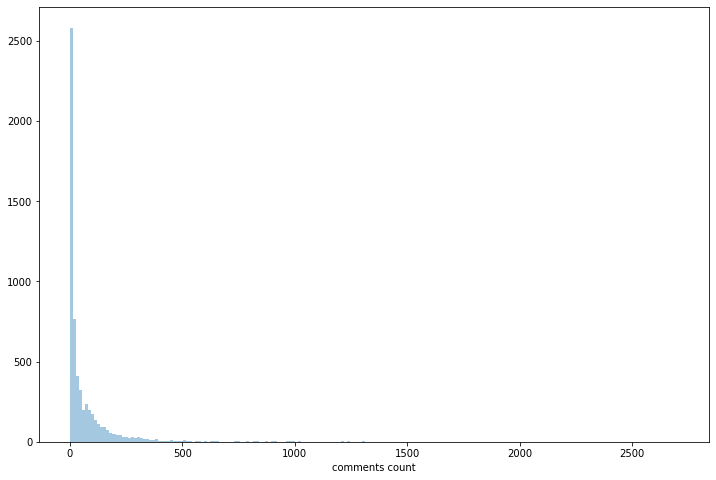

In [150]:
sb.distplot(dataset['comments count'], bins=200, kde=False)

In [171]:
no_comments = (dataset['comments count'] == 0).sum()
print("No comments :", no_comments)

no_comments = (dataset['comments count'] < 10).sum()
print("Less than 10 comments :", no_comments)

print("Median number of comments :", dataset['comments count'].median())

No comments : 342
Less than 10 comments : 2189
Median number of comments : 20.0


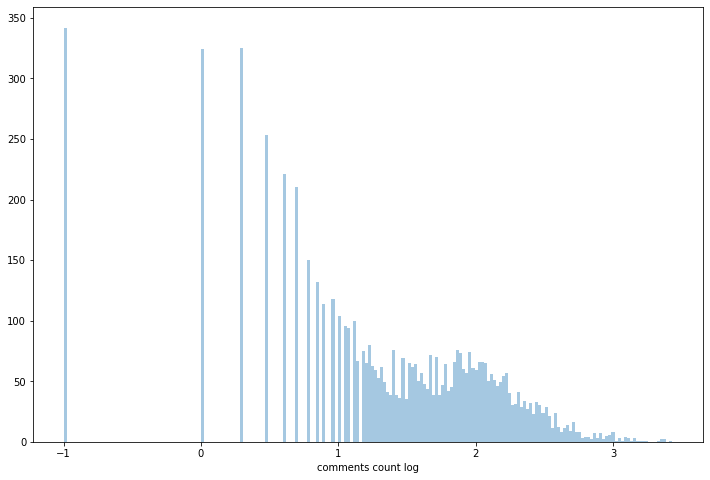

In [169]:
scores = np.where(dataset['comments count'] > 0.1, dataset['comments count'], 0.1)

dataset['comments count log'] = np.log10(scores)

sb.distplot(dataset['comments count log'], bins=200, kde=False)

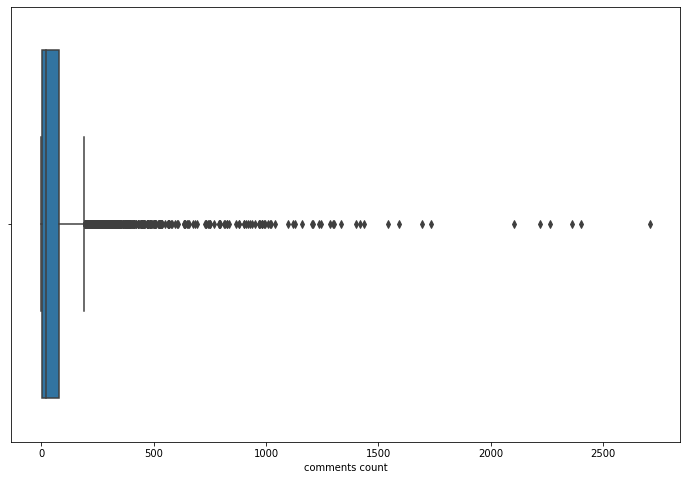

In [162]:
sb.boxplot(x=dataset['comments count'])

# Matrica korelacije

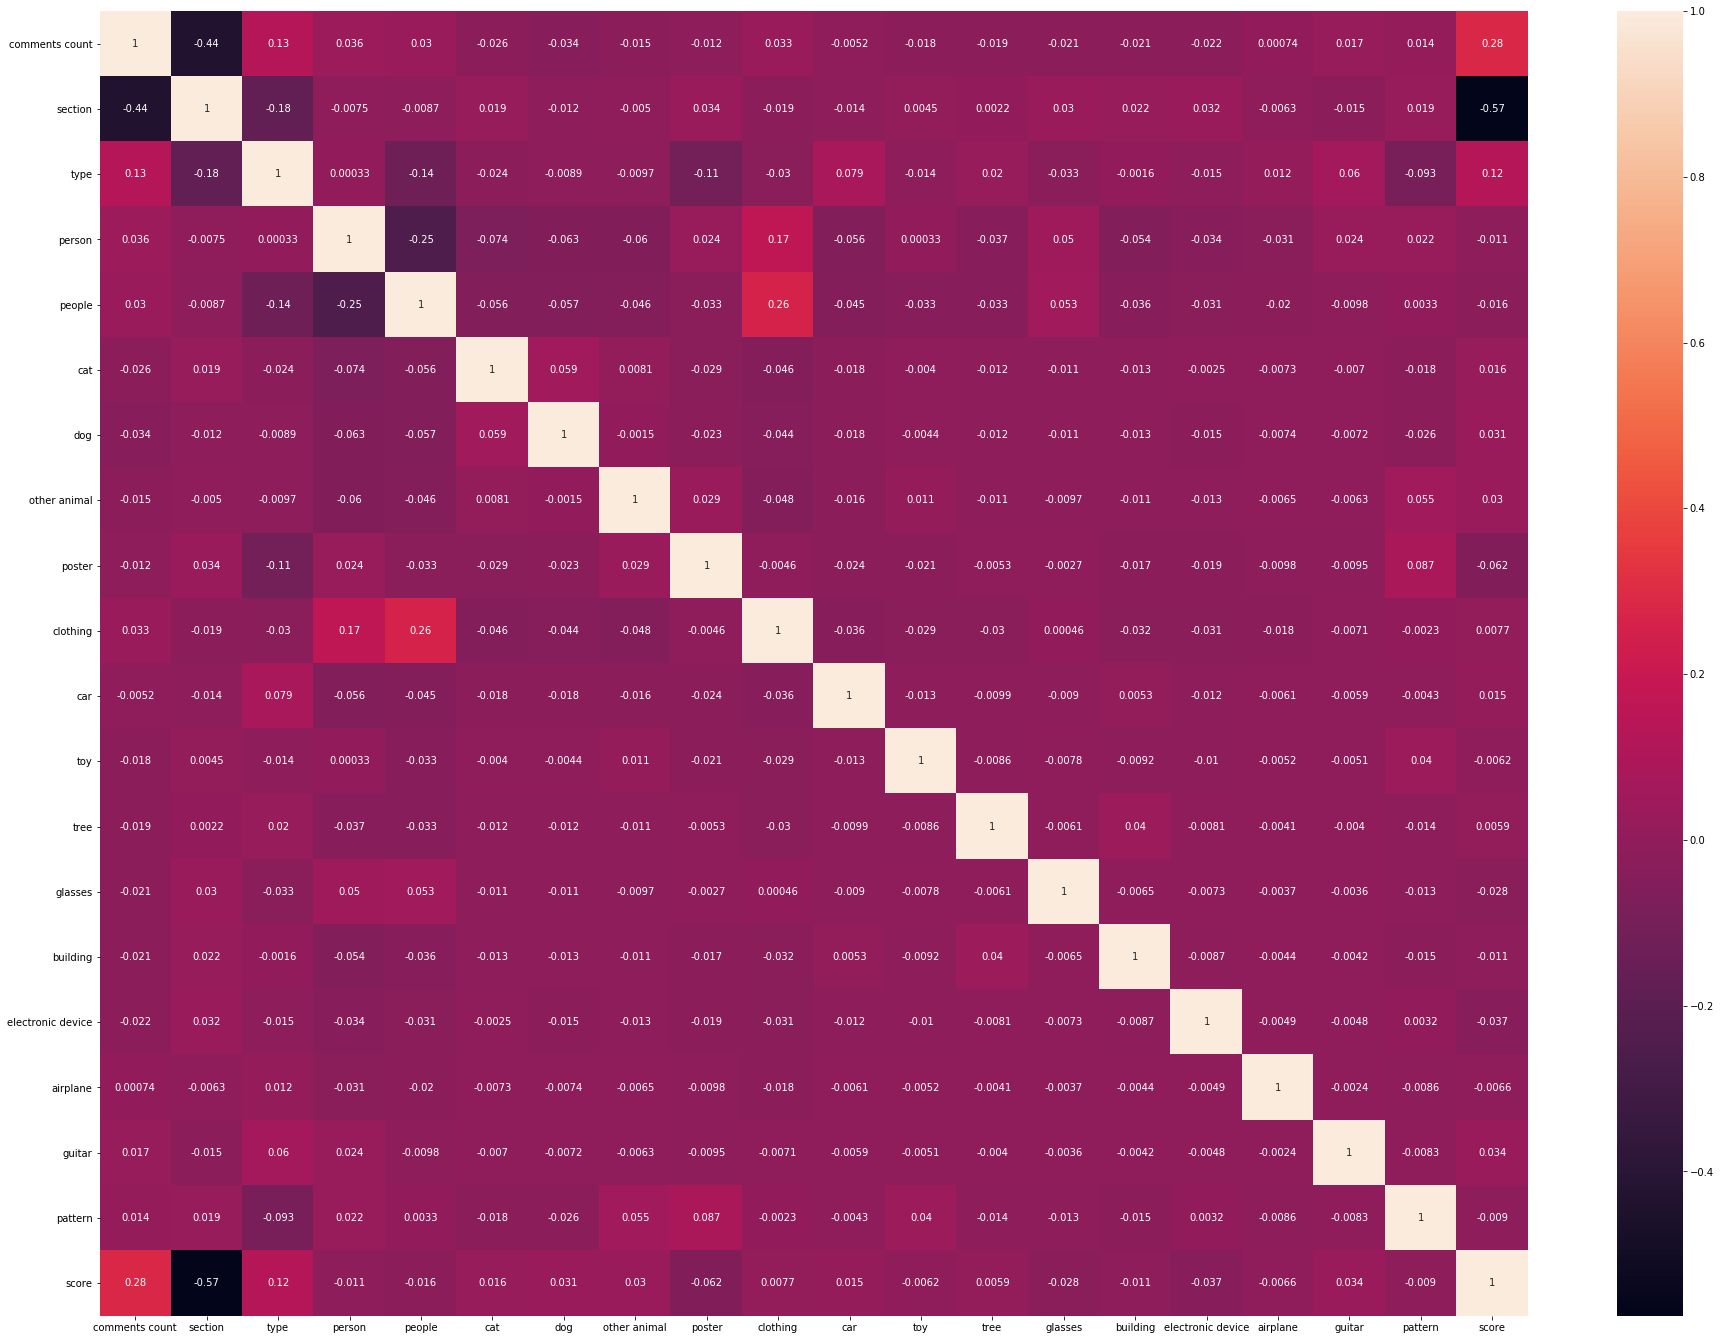

In [168]:
plt.rcParams["figure.figsize"] = (32,24)
sb.heatmap(dataset.corr(), annot=True)
plt.rcParams["figure.figsize"] = (12,8)

In [176]:
# Broj komentara po tipu
photos = dataset.loc[dataset['type'] == 1]
animated = dataset.loc[dataset['type'] == 2]

print("Mean number of comments on photos :", photos['comments count'].mean())
print("Mean number of comments on animated posts :", animated['comments count'].mean())


Mean number of comments on photos : 58.45667997182437
Mean number of comments on animated posts : 102.69679633867277


# Predikcije

In [204]:
df_pred = pd.read_csv('../predictions.csv')
df_pred.shape

(15623, 2)

In [205]:
df_pred.describe()

,ground truth,prediction
count,15623.000000,15623.000000
mean,15.454552,15.007220
std,13.857598,6.422816
min,0.000000,0.838554
25%,5.159091,14.446334
50%,12.090909,15.321914
75%,21.655462,15.829911
max,117.012500,79.889461


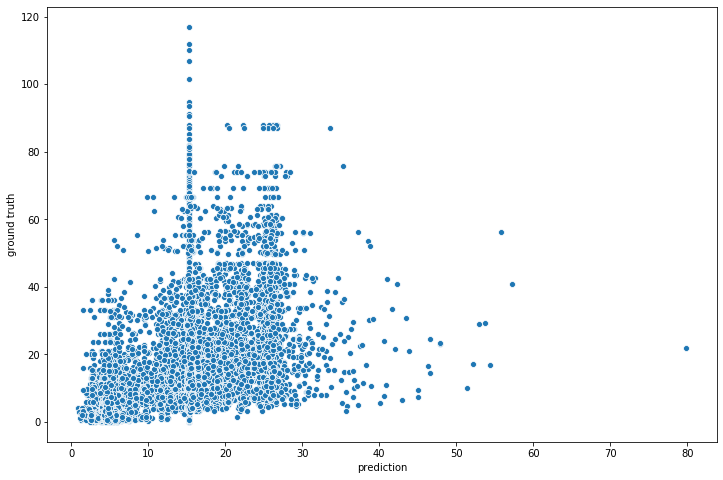

In [207]:
sb.scatterplot(x='prediction', y='ground truth', data=df_pred)

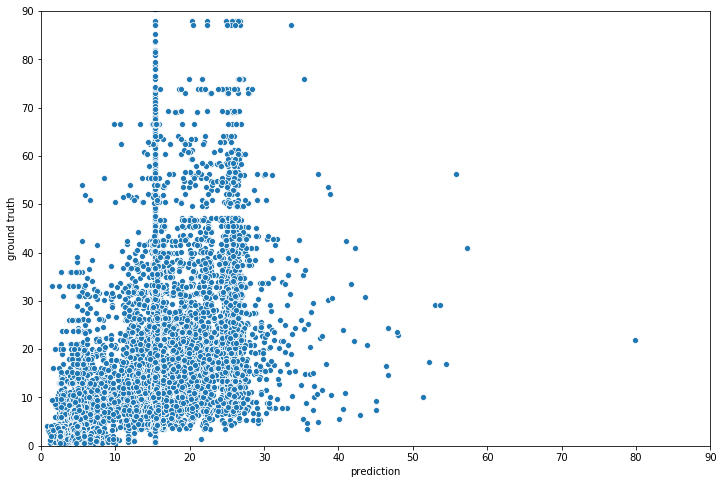

In [209]:
fig, ax = plt.subplots()
sb.scatterplot(x='prediction', y='ground truth', data=df_pred, ax=ax)
ax.set_xlim(0, 90)
ax.set_ylim(0, 90)
plt.show()

# Distribucija detektovanih objekata

In [230]:
import csv

In [237]:
PERSON =             0b000000000000001
PEOPLE =             0b000000000000010
CAT =                0b000000000000100
DOG =                0b000000000001000
OTHER_ANIMAL =       0b000000000010000
POSTER =             0b000000000100000
CLOTHING =           0b000000001000000
CAR =                0b000000010000000
TOY =                0b000000100000000
TREE =               0b000001000000000
GLASSES =            0b000010000000000
BUILDING =           0b000100000000000
ELECTRONIC_DEVICE =  0b001000000000000
AIRPLANE =           0b010000000000000
GUITAR =             0b100000000000000

person_cnt = 0
people_cnt = 0
cat_cnt = 0
dog_cnt = 0
other_animal_cnt = 0
poster_cnt = 0
clothing_cnt = 0
car_cnt = 0
toy_cnt = 0
tree_cnt = 0
glasses_cnt = 0
building_cnt = 0
electronic_device_cnt = 0
airplane_cnt = 0
guitar_cnt = 0



In [241]:
person_cnt = 0
people_cnt = 0
cat_cnt = 0
dog_cnt = 0
other_animal_cnt = 0
poster_cnt = 0
clothing_cnt = 0
car_cnt = 0
toy_cnt = 0
tree_cnt = 0
glasses_cnt = 0
building_cnt = 0
electronic_device_cnt = 0
airplane_cnt = 0
guitar_cnt = 0

with open('mapped_detections.csv', 'r', newline='') as mapped_file:
    lines = list(csv.reader(mapped_file))

    for line in lines:

        feature_vector = int(line[1], 2)

        # print("Image ", line[0], ": ", end='')
        # print(format(feature_vector, '#017b'))

        # print()
        
        if feature_vector & PERSON != 0:
            person_cnt += 1
        
        if feature_vector & PEOPLE != 0:
            people_cnt += 1
        
        if feature_vector & CAT != 0:
            cat_cnt += 1
        
        
        
        
        if feature_vector & DOG != 0:
            dog_cnt += 1
            
        if feature_vector & OTHER_ANIMAL != 0:
            other_animal_cnt += 1
            
        if feature_vector & POSTER != 0:
            poster_cnt += 1
        
        
        
            
        if feature_vector & CLOTHING != 0:
            clothing_cnt += 1
            
        if feature_vector & CAR != 0:
            car_cnt += 1
            
        if feature_vector & TOY != 0:
            toy_cnt += 1
            
        
        
        if feature_vector & TREE != 0:
            tree_cnt += 1
            
        if feature_vector & GLASSES != 0:
            glasses_cnt += 1
            
        if feature_vector & BUILDING != 0:
            building_cnt += 1
            
            
        
        if feature_vector & ELECTRONIC_DEVICE != 0:
            electronic_device_cnt += 1
            
        if feature_vector & AIRPLANE != 0:
            airplane_cnt += 1
            
        if feature_vector & GUITAR != 0:
            guitar_cnt += 1
        

In [243]:
print(person_cnt)
print(people_cnt)
print(cat_cnt)
print(dog_cnt)
print(other_animal_cnt)
print(poster_cnt)
print(clothing_cnt)
print(car_cnt)
print(toy_cnt)
print(tree_cnt)
print(glasses_cnt)
print(building_cnt)
print(electronic_device_cnt)
print(airplane_cnt)
print(guitar_cnt)

all_cnt = [person_cnt,
people_cnt,
cat_cnt,
dog_cnt,
other_animal_cnt,
poster_cnt,
clothing_cnt,
car_cnt,
toy_cnt,
tree_cnt,
glasses_cnt,
building_cnt,
electronic_device_cnt,
airplane_cnt,
guitar_cnt]

1655
857
125
129
101
224
716
87
65
40
33
46
58
15
14


In [244]:
all_cnt

[1655, 857, 125, 129, 101, 224, 716, 87, 65, 40, 33, 46, 58, 15, 14]